In [85]:
import numpy as np

def uni_rand():
    """
    Gives a random number of either -1 or 1.
    """
    pdf = [-1, 1]
    return pdf[np.random.randint(0,2)]

def random_adj_square(X):
    """
    This function returns a matrix to simulate the Bision moving randonly
    to an adjacent square. The rules are:
      - If the adjacent square that is randomly chose
        in occupied, the Bison stays put
      - If the square is empty, the Bision will enter it
    """
    n,m = np.shape(X)
    for i in range(n):
        for j in range(m):
            if X[i,j]:
                idx = [i+uni_rand(),j+uni_rand()]
                if idx[0] > (n-1):
                    idx[0] = (idx[0] - n)
                if idx[1] > (m-1):
                    idx[1] = (idx[1] - m)
                if not X[idx[0],idx[1]]:
                    X[idx[0],idx[1]] = True
                    X[i,j] = False
    return X

def death(X, death_prob):
    """
    A Bison dies
    """
    n,m = np.shape(X)
    for i in range(n):
        for j in range(m):
            if X[i,j]:
                #maybe kill the Bison
                if np.random.uniform(0,1) < death_prob:
                    X[i,j] = False
    return X

def birth(X, birth_prob):
    """
    A Bison is born
    
    This is achieved in a very circuitous way...
    
    First, return a matrix of random adjcent squares.
    
    Then assign a random number to each element that is True in the
    matrix you just got.
    
    Then turn that number into a boolean value based on the probability
    of birth happening.
    
    Then return the boolean matrices joined together.
    """
    Y = np.copy(X) #if you don't copy then you confusingly only
                   # pass a reference to the cell
    Y = random_adj_square(Y) #Get a random matrix of adjcent cells
    
    #If the cell in the above matrix is true, then put a random
    #number between 0 and 1 in the cell
    rand_num_mat = np.multiply(Y,np.random.uniform(0,1,np.shape(Y)))
    
    #if that cell is greater than some value make it true, otherwise
    #leave it false
    bool_mat = rand_num_mat>(1-birth_prob)    
    
    #Y & bool_mat means if for each cell, both cells are true create
    #a matrix where those cells are true and if for each cell one is 
    #true and one is false, make the cell in the new matrix false
    
    #X | ... means for each cell, if either cell is true, return true
    return X | (Y & bool_mat)

def life_random_walk(X, birth_prob, death_prob):
    """
    A bison experiences life...
    """
    X = random_adj_square(X) #move Bison to new random patch
    X = death(X, death_prob) #for bison in that new patch, kill some
    X = birth(X, birth_prob) #give birth to some new Bison

    return X
    
life_step = life_random_walk

In [86]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [87]:
# JSAnimation import available at https://github.com/jakevdp/JSAnimation
from JSAnimation.IPython_display import display_animation, anim_to_html
from matplotlib import animation

def life_animation(X, birth_rate, death_rate, 
                   dpi=10, frames=10, interval=300, mode='loop'):
    """Produce a Game of Life Animation
    
    Parameters
    ----------
    X : array_like
        a two-dimensional numpy array showing the game board
    dpi : integer
        the number of dots per inch in the resulting animation.
        This controls the size of the game board on the screen
    frames : integer
        The number of frames to compute for the animation
    interval : float
        The time interval (in milliseconds) between frames
    mode : string
        The default mode of the animation.  Options are ['loop'|'once'|'reflect']
    """
    X = np.asarray(X)
    assert X.ndim == 2
    X = X.astype(bool)
    
    X_blank = np.zeros_like(X)
    figsize = (X.shape[1] * 1. / dpi, X.shape[0] * 1. / dpi)

    fig = plt.figure(figsize=figsize, dpi=dpi)
    ax = fig.add_axes([0, 0, 1, 1], xticks=[], yticks=[], frameon=False)
    im = ax.imshow(X, cmap=plt.cm.binary, interpolation='nearest')
    im.set_clim(-0.05, 1)  # Make background gray

    # initialization function: plot the background of each frame
    def init():
        im.set_data(X_blank)
        return (im,)

    # animation function.  This is called sequentially
    def animate(i):
        im.set_data(animate.X)
        animate.X = life_step(animate.X, birth_rate, death_rate)
        return (im,)
    animate.X = X

    anim = animation.FuncAnimation(fig, animate, init_func=init,
                                   frames=frames, interval=interval)
    
    #print anim_to_html(anim)
    return display_animation(anim, default_mode=mode)


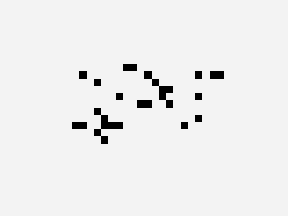
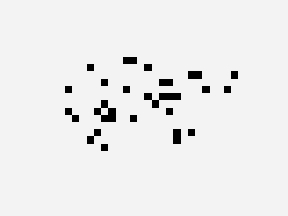
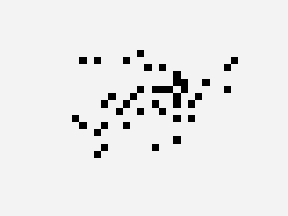
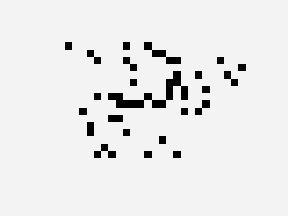
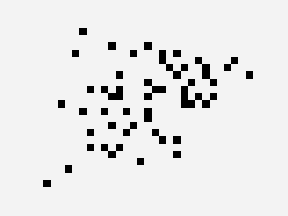
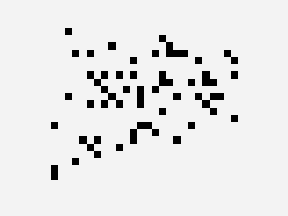
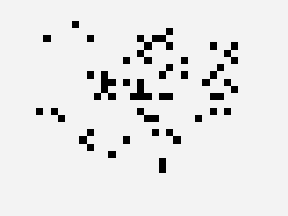
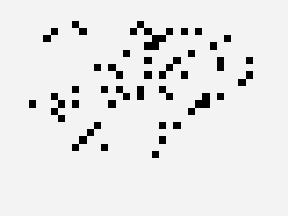
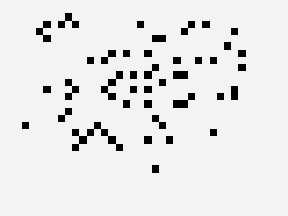
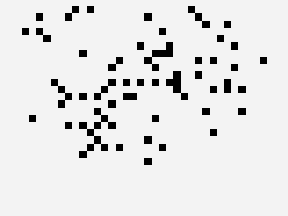
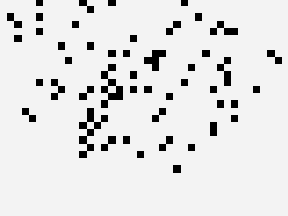
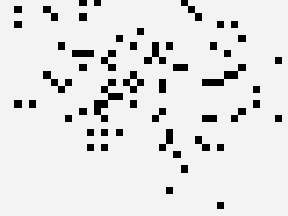
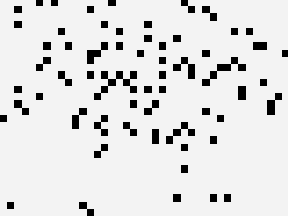
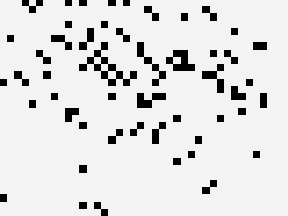
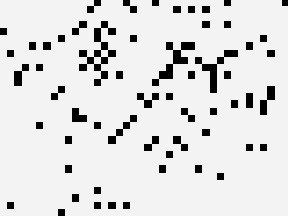
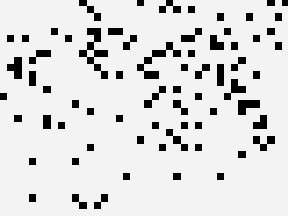
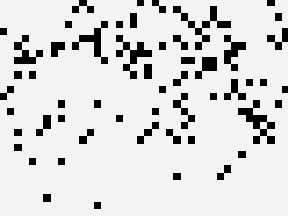
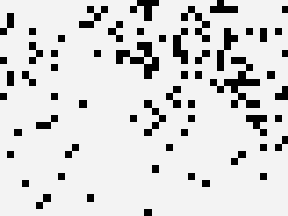
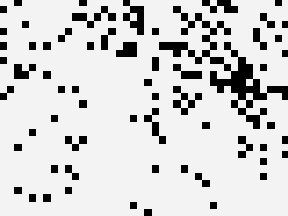
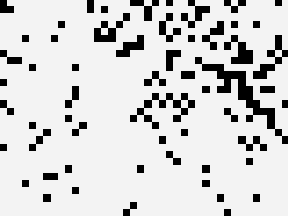
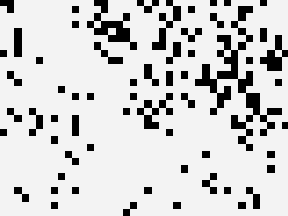
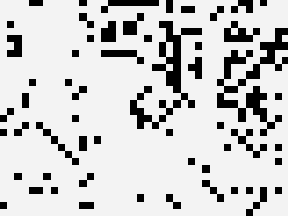
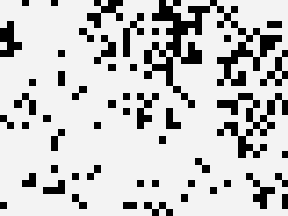
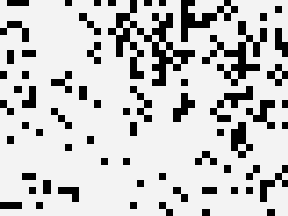
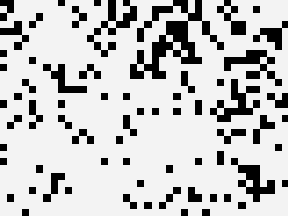
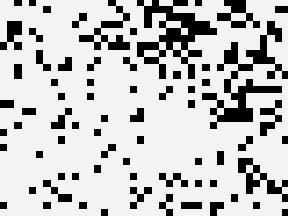
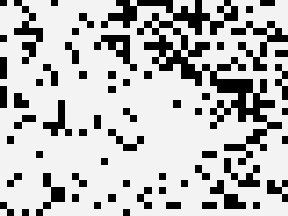
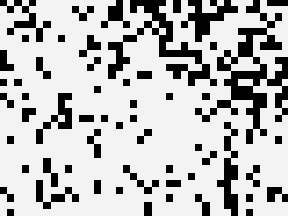
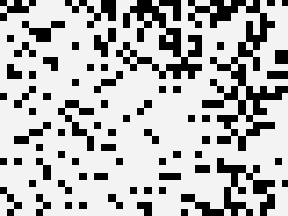
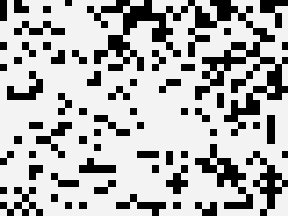
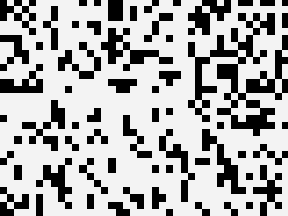
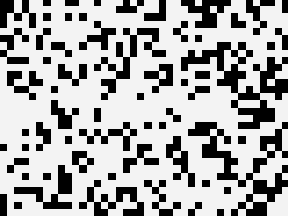
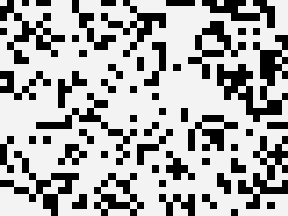
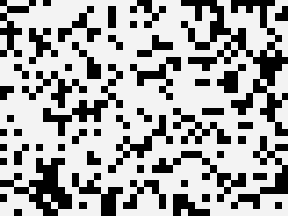
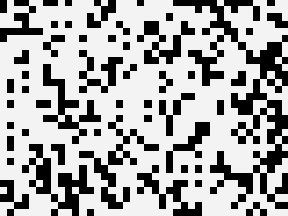
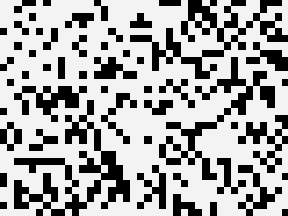
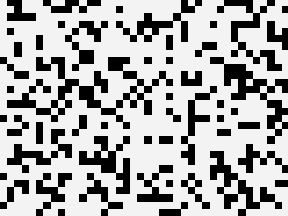
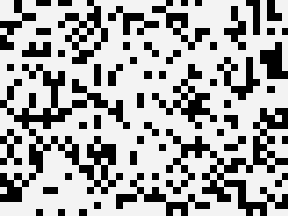
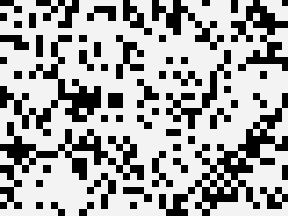
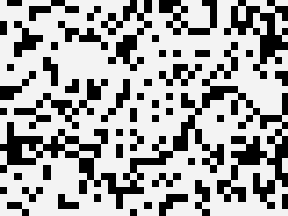

In [88]:
birth_rate = 0.9
death_rate = 0.3

np.random.seed(0)
X = np.zeros((30, 40), dtype=bool)
r = np.random.random((10, 20))
X[10:20, 10:30] = (r > 0.75)
life_animation(X,birth_rate, death_rate,  dpi=10, frames=40, mode='once')